In [1]:
import numpy as np
import pandas as pd
import merger_tree_tools as mtt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
# Tamaño de visualización de los DataFrame

pd.options.display.max_rows = 25
pd.options.display.max_columns = 50

In [3]:
DF = pd.read_csv('galaxy_massive_project_RefL0100N1504_snap_28.dat')

In [4]:
DF

,GalaxyID,SnapNum,GroupID,SubGroupNumber,Stars_Mass,SF_Hydrogen,SF_Oxygen,SF_Mass,NSF_Mass,BlackHoleMass,StarFormationRate,KappaCoRot
0,8635516,28,28000000000711,0,8.826301e+09,0.697077,0.010603,6.025814e+08,5.904201e+10,1.273919e+07,0.330273,0.182239
1,8734901,28,28000000000993,0,2.345990e+10,0.675856,0.014520,5.371019e+09,3.786994e+10,2.123230e+06,2.067249,0.674364
2,8799477,28,28000000001064,0,1.215875e+10,0.728434,0.004775,6.559248e+07,3.376860e+10,3.169334e+07,0.040535,0.175991
3,8853143,28,28000000001108,0,2.009783e+10,0.681485,0.013273,4.337494e+09,3.680202e+10,4.752274e+06,1.945700,0.517854
4,8906927,28,28000000001153,0,3.561124e+10,0.664958,0.015482,2.465163e+09,4.331581e+10,1.333169e+07,1.056540,0.599660
...,...,...,...,...,...,...,...,...,...,...,...,...
7114,12977375,28,28000000006029,0,1.368914e+09,0.648142,0.018163,3.154548e+07,1.503231e+09,7.483997e+05,0.008310,0.273299
7115,12992093,28,28000000006072,0,2.717657e+09,0.633700,0.020021,1.254719e+08,1.040611e+09,5.109298e+05,0.045476,0.210340
7116,13006549,28,28000000006119,0,1.523133e+09,0.691102,0.011915,3.516830e+08,4.681607e+09,7.049160e+05,0.118592,0.427493
7117,13021024,28,28000000006162,0,1.126520e+09,0.661381,0.016129,1.009086e+08,1.307544e+09,1.141613e+06,0.038583,0.154350


In [5]:
DF_NEW = DF.copy()

In [6]:
DF_NEW['Log(Ms)']    = np.log10(DF['Stars_Mass'])
DF_NEW['Log(BHM)']   = np.log10(DF['BlackHoleMass'])
DF_NEW['Log(sSFR)']  = np.log10(DF['StarFormationRate']) - np.log10(DF['Stars_Mass'])
DF_NEW['12+Log(O/H)']=  12 + np.log10(DF['SF_Oxygen'])-np.log10(DF['SF_Hydrogen'])-np.log10(16)
DF_NEW['F_g']        = DF['SF_Mass']/(DF['Stars_Mass']+DF['SF_Mass'])
DF_NEW['Log(SF_M)']  = np.log10(DF['SF_Mass'])

DF_NEW.drop(columns = ['SF_Hydrogen','SF_Oxygen', 'SF_Mass', 'NSF_Mass', 'BlackHoleMass',
       'StarFormationRate','Stars_Mass'], inplace = True)

/home/ramiro/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
DF_NEW

,GalaxyID,SnapNum,GroupID,SubGroupNumber,KappaCoRot,Log(Ms),Log(BHM),Log(sSFR),12+Log(O/H),F_g,Log(SF_M)
0,8635516,28,28000000000711,0,0.182239,9.945779,7.105142,-10.426906,8.978009,0.063908,8.780016
1,8734901,28,28000000000993,0,0.674364,10.370326,6.326997,-10.054933,9.127978,0.186294,9.730057
2,8799477,28,28000000001064,0,0.175991,10.084889,7.500968,-11.477062,8.612456,0.005366,7.816854
3,8853143,28,28000000001108,0,0.517854,10.303149,6.676901,-10.014073,9.085394,0.177509,9.637239
4,8906927,28,28000000001153,0,0.599660,10.551587,7.124885,-10.527701,9.162925,0.064743,9.391846
...,...,...,...,...,...,...,...,...,...,...,...
7114,12977375,28,28000000006029,0,0.273299,9.136376,5.874134,-11.216749,9.243397,0.022525,7.498937
7115,12992093,28,28000000006072,0,0.210340,9.434195,5.708361,-10.776415,9.295472,0.044132,8.098546
7116,13006549,28,28000000006119,0,0.427493,9.182738,5.848137,-10.108683,9.032425,0.187583,8.546151
7117,13021024,28,28000000006162,0,0.154350,9.051739,6.057519,-10.465344,9.183023,0.082211,8.003928


#### Filtramos según las condiciones que querramos  #

In [41]:
cond = (DF_NEW['Log(Ms)']<=11.5)&(DF_NEW['Log(Ms)']>=9.8)&(DF_NEW['Log(SF_M)']>=7.5)&(DF_NEW['KappaCoRot']>=0.56)&(DF_NEW['SubGroupNumber']==0)#|(DF_NEW['KappaCoRot']<=0.3))
SELECT = DF_NEW[cond]

### Correlación entre magnitudes

             KappaCoRot   Log(Ms)  Log(BHM)  Log(sSFR)  12+Log(O/H)       F_g  \
KappaCoRot     1.000000  0.243547  0.016898   0.291973     0.063964  0.353604   
Log(Ms)        0.243547  1.000000  0.900189  -0.397911     0.132459 -0.367175   
Log(BHM)       0.016898  0.900189  1.000000  -0.484775    -0.006559 -0.407830   
Log(sSFR)      0.291973 -0.397911 -0.484775   1.000000    -0.238255  0.809399   
12+Log(O/H)    0.063964  0.132459 -0.006559  -0.238255     1.000000 -0.551498   
F_g            0.353604 -0.367175 -0.407830   0.809399    -0.551498  1.000000   
Log(SF_M)      0.527001  0.607757  0.434515   0.466049    -0.092187  0.366994   

             Log(SF_M)  
KappaCoRot    0.527001  
Log(Ms)       0.607757  
Log(BHM)      0.434515  
Log(sSFR)     0.466049  
12+Log(O/H)  -0.092187  
F_g           0.366994  
Log(SF_M)     1.000000  


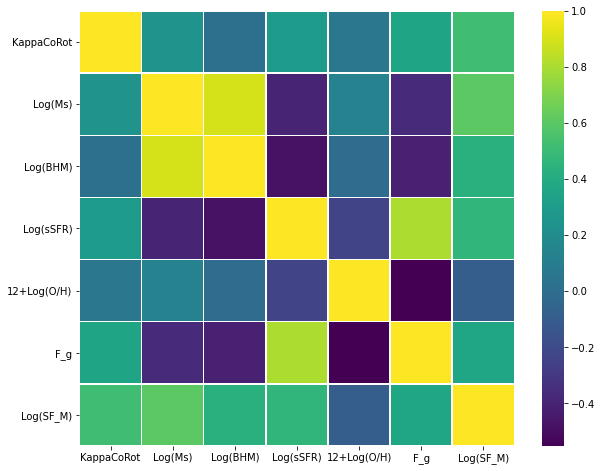

In [42]:
X = DF_NEW.iloc[:,4:]
f, ax = plt.subplots(figsize=(10, 8))
corr_1 = X.corr()
print(corr_1)
sns.heatmap(corr_1, mask=np.zeros_like(corr_1), cmap="viridis",square=True, ax=ax, linewidths=.5)
plt.show() 

## Estudio de bin de masa interesado

In [43]:
cond_bin = (SELECT['Log(Ms)']<=10.8)&(SELECT['Log(Ms)']>=10.6)

In [44]:
SELECT_BIN = SELECT[cond_bin]
SELECT_BIN

,GalaxyID,SnapNum,GroupID,SubGroupNumber,KappaCoRot,Log(Ms),Log(BHM),Log(sSFR),12+Log(O/H),F_g,Log(SF_M)
73,8856888,28,28000000001111,0,0.683312,10.695220,7.506585,-10.584390,9.246823,0.052655,9.440152
210,8653534,28,28000000000784,0,0.687040,10.606704,6.606323,-10.096028,9.187281,0.159453,9.884775
775,8970962,28,28000000001194,0,0.612065,10.611602,6.526986,-10.237887,9.239460,0.114310,9.722406
862,9925265,28,28000000001770,0,0.660491,10.618416,6.848195,-11.006835,9.476090,0.017042,8.857412
2030,8719657,28,28000000000957,0,0.671781,10.606663,7.043089,-10.337596,9.119637,0.107727,9.688489
...,...,...,...,...,...,...,...,...,...,...,...
6445,17969165,28,28000000000820,0,0.589451,10.687956,7.546625,-10.407479,9.307258,0.081643,9.636864
6447,18129274,28,28000000000895,0,0.672445,10.674003,7.299053,-10.300887,9.176446,0.127946,9.840486
6589,18345325,28,28000000000975,0,0.703544,10.771510,7.505293,-10.586863,9.319938,0.067393,9.630423
6656,18065713,28,28000000000869,0,0.670057,10.654173,6.973525,-10.125103,9.270027,0.087257,9.634625


## Vemos las historias de mergers y las main branch de las galaxias

In [45]:
MAIN_BRANCH = pd.DataFrame()#Datafreme vacio para las main branch

In [46]:
data = {'GalaxyID_test':[],'GroupID_test':[],
        'Lm_snap1':[],'Lm_snap2':[],'Lm_snap3':[],'Lm_snap4':[],
        'Lm_snap5':[],'Lm_snap6':[],'Lm_snap7':[],'Lm_snap8':[],
        'Lm_snap9':[],'Lm_snap10':[],'Lm_snap11':[],'Lm_snap12':[],
        'Lm_snap13':[],'Lm_snap14':[],'Lm_snap15':[],'Lm_snap16':[],
        'Lm_snap17':[],'Lm_snap18':[],'Lm_snap19':[],'Lm_snap20':[],
        'Lm_snap21':[],'Lm_snap22':[],'Lm_snap23':[],'Lm_snap24':[],
        'Lm_snap25':[],'Lm_snap26':[],'Lm_snap27':[],'Lm_snap28':[]}

DATA_merge = pd.DataFrame(data=data) #DataFrame que contiene el hitorial de mergers

In [47]:
table_a = SELECT_BIN.copy() #Creo una copia del datafreme que queremos analizar 

In [48]:
simu='RefL0100N1504'
snap=28

long = len(table_a['GalaxyID'])

# long = 10

# Usuario y contraseña para conectarse a EAGLE DataBase
usr='cht015'
pwd='BH457tfj'

# Descargar merger tree completo de la galaxia deseada
# Nombre y alias de la tabla de la cual se quieren descargar datos
table='SubHalo'
table_alias='sub'

# Variables que se quiere descargar. OJO!! Asegurarse que estas variables
# estén en la tabla deseada.
columns=[
          'GalaxyID','LastProgID','TopLeafID','DescendantID',
          'SnapNum','Redshift','Stars_Mass','SF_Mass','GroupID',
          'BlackHoleMass','SF_Hydrogen','SF_Oxygen','StarFormationRate'
        ]


#Loop para todas las galaxias de la tabla
for p in np.arange(long):

    galid = table_a['GalaxyID'].to_numpy()[p]
 
    # Descargar todos los IDS necesarios de la galaxia deseada

    myIDs    = mtt.retrieve_ids(usr,pwd,simu,snap,galid)

    raw_tree = mtt.download_merger_tree(usr,pwd,simu,myIDs['GalaxyID'],myIDs['LastProgID'],
                                  table=table,table_alias=table_alias,columns=columns)
    
    # Aplicar condiciones a las galaxias del árbol, si es necesario
    mask = (
            (raw_tree['Stars_Mass']>0)
           )

    # Armar arbol sólo con galaxias seleccionadas según condiciones anteriores
    tree = {}
    for key in raw_tree.keys():
        tree[key]=raw_tree[key][mask]
        
    # Ordeno las galaxias según SnapNum creciente
    mask_order = (tree['SnapNum']).argsort()
    for key in tree.keys():
        tree[key] = tree[key][mask_order]

    # Armo un diccionario con solo la main branch del árbol
    main_branch = {}
    # Select galaxies in the main branch 
    mask_main = np.logical_and(tree['GalaxyID']>=myIDs['GalaxyID'],
                               tree['GalaxyID']<=myIDs['TopLeafID']) 

    for key in tree.keys():
        main_branch[key] = tree[key][mask_main]
     
    
    main_branch['GalaxyID_snap28'] = galid
    
    MAIN_BRANCH_TEMP = pd.DataFrame(main_branch)
    MAIN_BRANCH = MAIN_BRANCH.append(MAIN_BRANCH_TEMP,ignore_index=True)
    
    xplot_main = main_branch['SnapNum']
   
    # Calculo level of merger
    level_merger=[1]       # Inicializo con un 1, porque la primer galaxia del main branch 
                           # no viene de ninguna fusión...
    
    for k in range(np.size(xplot_main)-1):
        m1=main_branch['Stars_Mass'][k]+main_branch['SF_Mass'][k]
        mask=(tree['DescendantID']==main_branch['GalaxyID'][k+1]) & (tree['SnapNum']!=28)
        # La condición de snapnum distinto a 28 es porque galaxias a z=0 no tienen descendiente,
        # y se les asigna como DescendantID su propio GalaxyID
        m2=np.sum(tree['Stars_Mass'][mask])+np.sum(tree['SF_Mass'][mask])
        level=m2/m1
        level_merger=np.append(level_merger,level)  
        
    #Calculamos las variables que nos interesan:
    
    i=0 

    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==1)):
        Lm_1 = level_merger[i]
        i=i+1
    else: Lm_1 = np.nan
    
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==2)):
        Lm_2 = level_merger[i]
        i=i+1
    else: Lm_2 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==3)):
        Lm_3 = level_merger[i]
        i=i+1
    else: Lm_3 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==4)):
        Lm_4 = level_merger[i]
        i=i+1
    else: Lm_4 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==5)):
        Lm_5 = level_merger[i]
        i=i+1
    else: Lm_5 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==6)):
        Lm_6 = level_merger[i]
        i=i+1
    else: Lm_6 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==7)):
        Lm_7 = level_merger[i]
        i=i+1
    else: Lm_7 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==8)):
        Lm_8 = level_merger[i]
        i=i+1
    else: Lm_8 = np.nan
    
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==9)):
        Lm_9 = level_merger[i]
        i=i+1
    else: Lm_9 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==10)):
        Lm_10 = level_merger[i]
        i=i+1
    else: Lm_10 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==11)):
        Lm_11 = level_merger[i]
        i=i+1
    else: Lm_11 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==12)):
        Lm_12 = level_merger[i]
        i=i+1
    else: Lm_12 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==13)):
        Lm_13 = level_merger[i]
        i=i+1
    else: Lm_13 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==14)):
        Lm_14 = level_merger[i]
        i=i+1
    else: Lm_14 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==15)):
        Lm_15 = level_merger[i]
        i=i+1
    else: Lm_15 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==16)):
        Lm_16 = level_merger[i]
        i=i+1
    else: Lm_16 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==17)):
        Lm_17 = level_merger[i]
        i=i+1
    else: Lm_17 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==18)):
        Lm_18 = level_merger[i]
        i=i+1
    else: Lm_18 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==19)):
        Lm_19 = level_merger[i]
        i=i+1
    else: Lm_19 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==20)):
        Lm_20 = level_merger[i]
        i=i+1
    else: Lm_20 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==21)):
        Lm_21 = level_merger[i]
        i=i+1
    else: Lm_21 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==22)):
        Lm_22 = level_merger[i]
        i=i+1
    else: Lm_22 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==23)):
        Lm_23 = level_merger[i]
        i=i+1
    else: Lm_23 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==24)):
        Lm_24 = level_merger[i]
        i=i+1
    else: Lm_24 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==25)):
        Lm_25 = level_merger[i]
        i=i+1
    else: Lm_25 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==26)):
        Lm_26 = level_merger[i]
        i=i+1
    else: Lm_26 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==27)):
        Lm_27 = level_merger[i]
        i=i+1
    else: Lm_27 = np.nan
        
    if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==28)):
        Lm_28 = level_merger[i]
        i=i+1
    else: Lm_28 = np.nan
   
    
    data = {'GalaxyID_test':table_a['GalaxyID'].to_numpy()[p],'GroupID_test':table_a['GroupID'].to_numpy()[p],
            'Lm_snap1':Lm_1,'Lm_snap2':Lm_2,'Lm_snap3':Lm_3,'Lm_snap4':Lm_4,
            'Lm_snap5':Lm_5,'Lm_snap6':Lm_6,'Lm_snap7':Lm_7,'Lm_snap8':Lm_8,
            'Lm_snap9':Lm_9,'Lm_snap10':Lm_10,'Lm_snap11':Lm_11,'Lm_snap12':Lm_12,
            'Lm_snap13':Lm_13,'Lm_snap14':Lm_14,'Lm_snap15':Lm_15,'Lm_snap16':Lm_16,
            'Lm_snap17':Lm_17,'Lm_snap18':Lm_18,'Lm_snap19':Lm_19,'Lm_snap20':Lm_20,
            'Lm_snap21':Lm_21,'Lm_snap22':Lm_22,'Lm_snap23':Lm_23,'Lm_snap24':Lm_24,
            'Lm_snap25':Lm_25,'Lm_snap26':Lm_26,'Lm_snap27':Lm_27,'Lm_snap28':Lm_28}

    DATA_merge = DATA_merge.append(data,ignore_index=True)
    
    print('Porcentaje:',round(float((p+1)/long),2),end='\r')
    
DATA_merge = DATA_merge.astype({'GalaxyID_test':int,'GroupID_test':int,
                                'Lm_snap1':float, 'Lm_snap2':float, 'Lm_snap3':float, 'Lm_snap4':float,
                                'Lm_snap5':float, 'Lm_snap6':float, 'Lm_snap7':float, 'Lm_snap8':float,
                                'Lm_snap9':float, 'Lm_snap10':float,'Lm_snap11':float,'Lm_snap12':float,
                                'Lm_snap13':float,'Lm_snap14':float,'Lm_snap15':float,'Lm_snap16':float,
                                'Lm_snap17':float,'Lm_snap18':float,'Lm_snap19':float,'Lm_snap20':float,
                                'Lm_snap21':float,'Lm_snap22':float,'Lm_snap23':float,'Lm_snap24':float,
                                'Lm_snap25':float,'Lm_snap26':float,'Lm_snap27':float,'Lm_snap28':float})

In [49]:
DATA_merge

,GalaxyID_test,GroupID_test,Lm_snap1,Lm_snap2,Lm_snap3,Lm_snap4,Lm_snap5,Lm_snap6,Lm_snap7,Lm_snap8,Lm_snap9,Lm_snap10,Lm_snap11,Lm_snap12,Lm_snap13,Lm_snap14,Lm_snap15,Lm_snap16,Lm_snap17,Lm_snap18,Lm_snap19,Lm_snap20,Lm_snap21,Lm_snap22,Lm_snap23,Lm_snap24,Lm_snap25,Lm_snap26,Lm_snap27,Lm_snap28
0,8856888,28000000001111,NaN,1.0,1.0,1.000000,1.000000,1.191727,1.020206,1.050597,1.000000,1.000000,1.323314,1.135565,1.353967,1.041586,1.407137,1.000854,1.055975,1.042399,1.013579,1.036523,1.013174,1.033455,1.008420,1.007634,1.001077,1.000000,1.004113,1.000040
1,8653534,28000000000784,NaN,1.0,1.0,1.000000,1.000000,1.014673,1.006664,1.005850,1.002184,1.001805,1.000000,1.004189,1.013103,1.000000,1.000633,1.000469,1.018396,1.000064,1.019112,1.023399,1.016903,1.013751,1.017118,1.032032,1.043775,1.038632,1.009442,1.023868
2,8970962,28000000001194,NaN,1.0,1.0,1.000000,1.014323,1.028835,1.005205,1.008517,1.001132,1.000000,1.034635,1.003371,1.781903,1.000000,1.000361,1.000721,1.007604,1.011359,1.085342,1.003012,1.003373,1.003351,1.002712,1.000057,1.000025,1.000000,1.000000,1.000000
3,9925265,28000000001770,NaN,NaN,NaN,1.000000,1.074896,1.061069,1.001751,1.094732,1.005391,1.001615,1.091318,1.010870,1.001959,1.029116,1.000119,1.001413,1.010501,1.009600,1.000494,1.003060,1.008860,1.000073,1.004121,1.004716,1.000000,1.000000,1.000000,1.000000
4,8719657,28000000000957,NaN,1.0,1.0,4.791290,1.637744,1.173013,1.000000,1.000000,1.003503,1.000000,1.040623,1.212438,1.084315,1.031097,1.009017,1.025742,1.015026,1.042877,1.000000,1.002856,1.000533,1.000000,1.000000,1.000077,1.000055,1.000050,1.000000,1.000076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,17969165,28000000000820,NaN,1.0,1.0,1.145981,3.984751,1.000000,1.000000,1.003749,1.053791,1.078550,1.085670,1.002185,1.008373,1.041054,1.072923,1.106886,1.000695,1.015509,1.032397,1.063339,1.014617,1.010741,1.014246,1.005718,1.003292,1.007716,1.006858,1.000019
82,18129274,28000000000895,NaN,NaN,NaN,1.000000,7.464843,1.000000,1.000000,2.543784,1.000000,1.189354,1.016816,1.011518,1.007779,1.033071,1.017712,1.001419,1.010994,1.316778,1.000646,1.025366,1.018695,1.157197,1.000069,1.018315,1.004262,1.019877,1.015169,1.007596
83,18345325,28000000000975,NaN,NaN,1.0,2.538557,1.441677,1.301456,1.000000,1.058849,1.382804,1.018186,1.030702,1.058389,1.014139,1.012792,1.025940,1.077278,1.031835,1.006982,1.009002,1.004044,1.000018,1.004246,1.005054,1.009706,1.003405,1.008729,1.000016,1.000032
84,18065713,28000000000869,NaN,1.0,1.0,1.000000,1.000000,1.000000,1.278016,1.005152,1.029817,1.000000,1.003894,1.000000,1.157796,1.001115,1.360301,1.002494,1.008978,1.034318,1.091134,1.006015,1.009055,1.010147,1.002302,1.008483,1.004093,1.002009,1.003152,1.003018


## Descargo de kappacorot

In [50]:
MAIN_KROT = pd.DataFrame()

In [51]:
long = len(table_a['GalaxyID'])

# long = 10

# Usuario y contraseña para conectarse a EAGLE DataBase
usr='cht015'
pwd='BH457tfj'

# Descargar merger tree completo de la galaxia deseada
# Nombre y alias de la tabla de la cual se quieren descargar datos
table='MorphoKinem'
table_alias='mor'

# Variables que se quiere descargar. OJO!! Asegurarse que estas variables
# estén en la tabla deseada.
columns=[
          'GalaxyID','KappaCoRot'
        ]

#Loop para todas las galaxias de la tabla
for p in np.arange(long):

    galid = table_a['GalaxyID'].to_numpy()[p]
 
    # Descargar todos los IDS necesarios de la galaxia deseada

    myIDs    = mtt.retrieve_ids(usr,pwd,simu,snap,galid)

    raw_tree = mtt.download_merger_tree(usr,pwd,simu,myIDs['GalaxyID'],myIDs['LastProgID'],
                                  table=table,table_alias=table_alias,columns=columns)
    
    # Aplicar condiciones a las galaxias del árbol, si es necesario
#     mask = (
#             (raw_tree['Stars_Mass']>0)
#            )
    mask = True

    # Armar arbol sólo con galaxias seleccionadas según condiciones anteriores
    tree = {}
    for key in raw_tree.keys():
        tree[key]=raw_tree[key][mask]
        
# #     # Ordeno las galaxias según SnapNum creciente
#     mask_order = (tree['SnapNum']).argsort()
#     for key in tree.keys():
#         tree[key] = tree[key][mask_order]

    # Armo un diccionario con solo la main branch del árbol
    main_branch = {}
    # Select galaxies in the main branch 
    mask_main = np.logical_and(tree['GalaxyID']>=myIDs['GalaxyID'],
                               tree['GalaxyID']<=myIDs['TopLeafID']) 

    for key in tree.keys():
        main_branch[key] = tree[key][mask_main]
    
    MAIN_BRANCH_TEMP = pd.DataFrame(main_branch)
    MAIN_KROT = MAIN_KROT.append(MAIN_BRANCH_TEMP,ignore_index=True)
    
    print('Porcentaje:',round(float((p+1)/long),2),end='\r')

In [52]:
# Limpiamos y fusionamos data(agregamos kappacorot)

MAIN_MERGE = MAIN_BRANCH.merge(MAIN_KROT, on = 'GalaxyID')
MAIN_MERGE.drop(columns = ['SubHaloGalaxyID_x','SubHaloGalaxyID_y'],inplace = True)
MAIN_MERGE

,GalaxyID,LastProgID,TopLeafID,DescendantID,SnapNum,Redshift,Stars_Mass,SF_Mass,GroupID,BlackHoleMass,SF_Hydrogen,SF_Oxygen,StarFormationRate,GalaxyID_snap28,KappaCoRot
0,8856904,8857093,8856914,8856903,12,3.016505e+00,1.177581e+09,3.121615e+09,12000000001226,4.674473e+05,0.742400,0.002883,1.708550,8856888,0.375952
1,8856903,8857245,8856914,8856902,13,2.478413e+00,3.463732e+09,6.366799e+09,13000000001056,7.803963e+05,0.736927,0.004257,6.074174,8856888,0.192378
2,8856902,8857326,8856914,8856901,14,2.237037e+00,5.780232e+09,8.978787e+09,14000000001177,1.106054e+06,0.732514,0.005179,5.192680,8856888,0.352933
3,8856901,8857556,8856914,8856900,15,2.012410e+00,1.011659e+10,1.478520e+10,15000000001196,1.453775e+06,0.728357,0.005964,13.103206,8856888,0.359393
4,8856900,8857681,8856914,8856899,16,1.736966e+00,1.508389e+10,1.725208e+10,16000000001314,2.419222e+06,0.723436,0.006917,12.864726,8856888,0.514135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,18288553,18290178,18288574,18288552,24,3.656686e-01,3.231226e+10,9.592708e+09,24000000001148,3.189526e+06,0.680233,0.013669,5.658122,18288549,0.651703
1574,18288552,18290268,18288574,18288551,25,2.709011e-01,3.441463e+10,8.037678e+09,25000000001129,3.733334e+06,0.671000,0.015167,4.175916,18288549,0.664132
1575,18288551,18290436,18288574,18288550,26,1.827099e-01,3.633476e+10,7.364683e+09,26000000001069,3.877765e+06,0.666064,0.015875,3.411961,18288549,0.669423
1576,18288550,18290525,18288574,18288549,27,1.006385e-01,3.785806e+10,7.841576e+09,27000000001013,3.929415e+06,0.671296,0.014888,3.490631,18288549,0.675754


## Clasificación de mergers

In [69]:
# Snap desde que queremos analizar los mergers
snap = 19

# Cota inferior de los mergers

lim_merger = 1.3

# Array con los valores de merger desde el snap que deseamos

data_merge = DATA_merge.iloc[:,int(snap+1):].values

# Lugares en el dataframe en donde se supera el límite de merger, el resultado es una tupla

place = np.where(DATA_merge.iloc[:,int(snap+1):].values>=lim_merger)

# Nos guardamos la lista de los galaxyID en el snap 28 que sufrieron mergers en los snpa identificados

ID_merger = np.array([],dtype = int)

for i in place[0]:
    ID_merger = np.append(ID_merger, int(DATA_merge.iloc[i,0]))
    
# Snaps en los cuales ocurren los mergers
snap_merger = place[1]+snap
print(len(snap_merger))

9


In [70]:
# Creamos un dataframe con los datos de la mainbranch en los snaps n y n-1, n siendo el snap del merger

EVENTS = pd.DataFrame()

Lm = pd.Series(data = np.array([]))

for ID,SNAP in zip(ID_merger,snap_merger):
    
    mask   = (MAIN_MERGE['GalaxyID_snap28'] == ID)&((MAIN_MERGE['SnapNum'] == SNAP)|(MAIN_MERGE['SnapNum'] == int(SNAP-1)))
    
    EVENTS = EVENTS.append(MAIN_MERGE[mask])

EVENTS.drop_duplicates(inplace = True)
    
for ID,SNAP in zip(EVENTS['GalaxyID_snap28'].values,EVENTS['SnapNum'].values):

    Lm = Lm.append(pd.Series(data =[DATA_merge[(DATA_merge['GalaxyID_test'] == ID)].values[0][SNAP+1]]))

EVENTS['Lm'] = Lm.values


EVENTS['Log(Ms)']    = np.log10(EVENTS['Stars_Mass'])
EVENTS['Log(BHM)']   = np.log10(EVENTS['BlackHoleMass'])
EVENTS['Log(sSFR)']  = np.log10(EVENTS['StarFormationRate']) - np.log10(EVENTS['Stars_Mass'])
EVENTS['12+Log(O/H)']= 12 + np.log10(EVENTS['SF_Oxygen'])-np.log10(EVENTS['SF_Hydrogen'])-np.log10(16)
EVENTS['F_g']        = EVENTS['SF_Mass']/(EVENTS['Stars_Mass']+EVENTS['SF_Mass'])
EVENTS['Log(SF_M)']  = np.log10(EVENTS['SF_Mass'])

EVENTS.drop(columns = ['SF_Hydrogen','SF_Oxygen', 'SF_Mass', 'BlackHoleMass',
       'StarFormationRate','Stars_Mass'], inplace = True)

In [71]:
EVENTS

,GalaxyID,LastProgID,TopLeafID,DescendantID,SnapNum,Redshift,GroupID,GalaxyID_snap28,KappaCoRot,Lm,Log(Ms),Log(BHM),Log(sSFR),12+Log(O/H),F_g,Log(SF_M)
279,16718096,16718890,16718112,16718095,18,1.259331,18000000001031,16718086,0.519272,1.012214,10.175737,6.596313,-9.439886,8.993459,0.335006,9.877973
280,16718095,16719380,16718112,16718094,19,1.004122,19000100000493,16718086,0.309788,1.434632,10.397452,6.959858,-9.422962,8.988055,0.329729,10.089359
323,16928823,16929912,16928847,16928822,26,0.182710,26000000000684,16928821,0.389959,1.017831,10.013741,5.652586,-9.625280,9.101480,0.270779,9.583497
324,16928822,16930886,16928847,16928821,27,0.100639,27000000000557,16928821,0.600557,3.190658,10.569484,6.964672,-9.997544,9.083399,0.189443,9.938179
507,15809556,15810365,15809576,15809555,22,0.615190,22000000000727,15809550,0.558835,1.013447,10.322322,6.244678,-9.556098,9.015621,0.301579,9.957606
508,15809555,15810867,15809576,15809554,23,0.503107,23000000000745,15809550,0.447226,1.304687,10.487370,6.652054,-9.552152,9.062580,0.248337,10.006387
544,17267404,17268788,17267424,17267403,22,0.615190,22000000001140,17267398,0.626422,215.707291,10.353652,6.265811,-9.710571,9.026443,0.307979,10.002053
556,16024923,16025374,16024939,16024922,19,1.004122,19000200000064,16024914,0.273627,1.025058,9.614989,5.805556,-9.226112,8.717774,0.521131,9.651718
557,16024922,16025775,16024939,16024921,20,0.865051,20000000001114,16024914,0.199159,1.460276,9.881991,6.040748,-8.956135,8.738599,0.547415,9.964609
560,16024919,16026245,16024939,16024918,23,0.503107,23000000000865,16024914,0.349880,1.012343,10.238710,6.751946,-9.650596,9.001100,0.298585,9.867804


##  Hacemos la diferencia magnitudes post y pre merger

In [72]:
DIF = pd.DataFrame(columns = ['GalaxyID_snap28','SnapNum','Redshift','Lm','Delta_KappaCoRot',
                              'Delta_Log(Ms)','Delta_Log(BHM)', 'Delta_Log(sSFR)', 'Delta_12+Log(O/H)', 'Delta_F_g', 'Delta_Log(SF_M)'])

PRE = pd.DataFrame(columns = ['GalaxyID_snap28','SnapNum','Redshift','Lm','KappaCoRot',
                              'Log(Ms)','Log(BHM)', 'Log(sSFR)', '12+Log(O/H)', 'F_g', 'Log(SF_M)'])

POST = pd.DataFrame(columns = ['GalaxyID_snap28','SnapNum','Redshift','Lm','KappaCoRot',
                              'Log(Ms)','Log(BHM)', 'Log(sSFR)', '12+Log(O/H)', 'F_g', 'Log(SF_M)'])

# Data Frame de la diferencia de parámetros post y pre merger
# for i in EVENTS.GalaxyID.values:
    
#     mask = ((EVENTS['GalaxyID'] == i)|(EVENTS['DescendantID'] == i))
    
#     if len(EVENTS['GalaxyID'][mask])>1:
        
#         Gal_28 = EVENTS['GalaxyID_snap28'][mask].values[1]
       
#         snup = EVENTS['SnapNum'][mask].values[1]
    
#         red = EVENTS['Redshift'][mask].values[1]
    
#         l  = EVENTS['Lm'][mask].values[1]
    
#         krt = EVENTS['KappaCoRot'][mask].values[1] - EVENTS['KappaCoRot'][mask].values[0]
    
#         lms = EVENTS['Log(Ms)'][mask].values[1] - EVENTS['Log(Ms)'][mask].values[0]
    
#         lbhn = EVENTS['Log(BHM)'][mask].values[1] - EVENTS['Log(BHM)'][mask].values[0]
    
#         lsfr = EVENTS['Log(sSFR)'][mask].values[1] - EVENTS['Log(sSFR)'][mask].values[0]
    
#         loh = EVENTS['12+Log(O/H)'][mask].values[1] - EVENTS['12+Log(O/H)'][mask].values[0]
    
#         fg = EVENTS['F_g'][mask].values[1] - EVENTS['F_g'][mask].values[0]
    
#         sfm = EVENTS['Log(SF_M)'][mask].values[1] - EVENTS['Log(SF_M)'][mask].values[0]
        
#         data= {'GalaxyID_snap28' : Gal_28,'SnapNum':snup,'Redshift':red,'Lm':l,'Delta_KappaCoRot':krt,
#                'Delta_Log(Ms)':lms,'Delta_Log(BHM)':lbhn, 'Delta_Log(sSFR)':lsfr, 'Delta_12+Log(O/H)':loh,'Delta_F_g':fg, 'Delta_Log(SF_M)':sfm}
        
#         DIF = DIF.append(data, ignore_index=True)
        
# DIF = DIF.astype({'GalaxyID_snap28' : int,'SnapNum':int,'Redshift':float,'Lm':float,'Delta_KappaCoRot':float,
#                                 'Delta_Log(Ms)':float,'Delta_Log(BHM)':float, 'Delta_Log(sSFR)':float, 'Delta_12+Log(O/H)':float, 
#                                  'Delta_F_g':float, 'Delta_Log(SF_M)':float})

# DIF = DIF[(DIF['Lm']<=10)] # Nos aseguramos de no estar tomando mergers menores al límite, también cota superior

# Data Frame con los valores Post merger
for i in EVENTS.GalaxyID.values:
    
    mask = ((EVENTS['GalaxyID'] == i)|(EVENTS['DescendantID'] == i))
    
    if (len(EVENTS['GalaxyID'][mask])>1)and(EVENTS['Lm'][mask].values[1]>=lim_merger):
        
        Gal_28 = EVENTS['GalaxyID_snap28'][mask].values[1]
       
        snup = EVENTS['SnapNum'][mask].values[1]
    
        red = EVENTS['Redshift'][mask].values[1]
    
        l  = EVENTS['Lm'][mask].values[1]
    
        krt = EVENTS['KappaCoRot'][mask].values[1] 
    
        lms = EVENTS['Log(Ms)'][mask].values[1] 
    
        lbhn = EVENTS['Log(BHM)'][mask].values[1]
    
        lsfr = EVENTS['Log(sSFR)'][mask].values[1]
    
        loh = EVENTS['12+Log(O/H)'][mask].values[1]
    
        fg = EVENTS['F_g'][mask].values[1]
    
        sfm = EVENTS['Log(SF_M)'][mask].values[1]
        
        data= {'GalaxyID_snap28' : Gal_28,'SnapNum':snup,'Redshift':red,'Lm':l,'KappaCoRot':krt,
               'Log(Ms)':lms,'Log(BHM)':lbhn, 'Log(sSFR)':lsfr, '12+Log(O/H)':loh,'F_g':fg, 'Log(SF_M)':sfm}
        
        POST = POST.append(data, ignore_index=True)
        
POST = POST.astype({'GalaxyID_snap28' : int,'SnapNum':int,'Redshift':float,'Lm':float,'KappaCoRot':float,
                                'Log(Ms)':float,'Log(BHM)':float, 'Log(sSFR)':float, '12+Log(O/H)':float, 
                                 'F_g':float, 'Log(SF_M)':float})

# POST = POST[(POST['Lm']<=10)] # Nos aseguramos de no estar tomando mergers menores al límite, también cota superior

# Data Frame con los valores Pre merger
for i in EVENTS.GalaxyID.values:
    
    mask = ((EVENTS['GalaxyID'] == i)|(EVENTS['DescendantID'] == i))
    
    if (len(EVENTS['GalaxyID'][mask])>1)and(EVENTS['Lm'][mask].values[1]>=lim_merger):
        
        Gal_28 = EVENTS['GalaxyID_snap28'][mask].values[0]
       
        snup = EVENTS['SnapNum'][mask].values[0]
    
        red = EVENTS['Redshift'][mask].values[0]
    
        l  = EVENTS['Lm'][mask].values[0]
    
        krt =  EVENTS['KappaCoRot'][mask].values[0]
    
        lms = EVENTS['Log(Ms)'][mask].values[0]
    
        lbhn = EVENTS['Log(BHM)'][mask].values[0]
    
        lsfr = EVENTS['Log(sSFR)'][mask].values[0]
    
        loh = EVENTS['12+Log(O/H)'][mask].values[0]
    
        fg = EVENTS['F_g'][mask].values[0]
    
        sfm = EVENTS['Log(SF_M)'][mask].values[0]
        
        data= {'GalaxyID_snap28' : Gal_28,'SnapNum':snup,'Redshift':red,'Lm':l,'KappaCoRot':krt,
               'Log(Ms)':lms,'Log(BHM)':lbhn, 'Log(sSFR)':lsfr, '12+Log(O/H)':loh,'F_g':fg, 'Log(SF_M)':sfm}
        
        PRE = PRE.append(data, ignore_index=True)
        
PRE = PRE.astype({'GalaxyID_snap28' : int,'SnapNum':int,'Redshift':float,'Lm':float,'KappaCoRot':float,
                                'Log(Ms)':float,'Log(BHM)':float, 'Log(sSFR)':float, '12+Log(O/H)':float, 
                                 'F_g':float, 'Log(SF_M)':float})

# PRE = PRE[(PRE['Lm']<=10)] # Nos aseguramos de no estar tomando mergers menores al límite, también cota superior

In [73]:
len(POST.drop_duplicates(subset=['GalaxyID_snap28'], keep='first'))

7

## Separamos según su soperte rotacional

In [42]:
ID_bajo_krot = SELECT_BIN['GalaxyID'][(SELECT_BIN['KappaCoRot']<=0.3)]
ID_bajo_krot.name = 'GalaxyID_snap28'
ID_alto_krot = SELECT_BIN['GalaxyID'][(SELECT_BIN['KappaCoRot']>=0.56)]
ID_alto_krot.name = 'GalaxyID_snap28'

In [26]:
# Tenemos 3 dataframes, pre mergers(PRE), post merger(POST) y su diferncia(DIF). Elegimos alguno y grficamos según su soporte rotacional en el snap 28

GRAFICAR = POST.copy()

# Separamos por kappacorot del snap 28

SELECT_BIN_ALTO = pd.merge(ID_alto_krot,GRAFICAR, on = 'GalaxyID_snap28')

SELECT_BIN_BAJO = pd.merge(ID_bajo_krot,GRAFICAR, on = 'GalaxyID_snap28')

SELECT_BIN_ALTO.replace([np.inf, -np.inf], np.nan, inplace=True)# Reemplazamos los valores inf por nan

SELECT_BIN_BAJO.replace([np.inf, -np.inf], np.nan, inplace=True)# Reemplazamos los valores inf por nan

In [43]:
ID_bajo_krot

2298    15350630
2300    15866157
2445    16692290
2513    16459278
2514    16598385
          ...   
6510    17382930
6580    17392884
6582    17654556
6590    18412316
6652    17676396
Name: GalaxyID_snap28, Length: 86, dtype: int64

### Graficamos histograma POST o PRE Merger

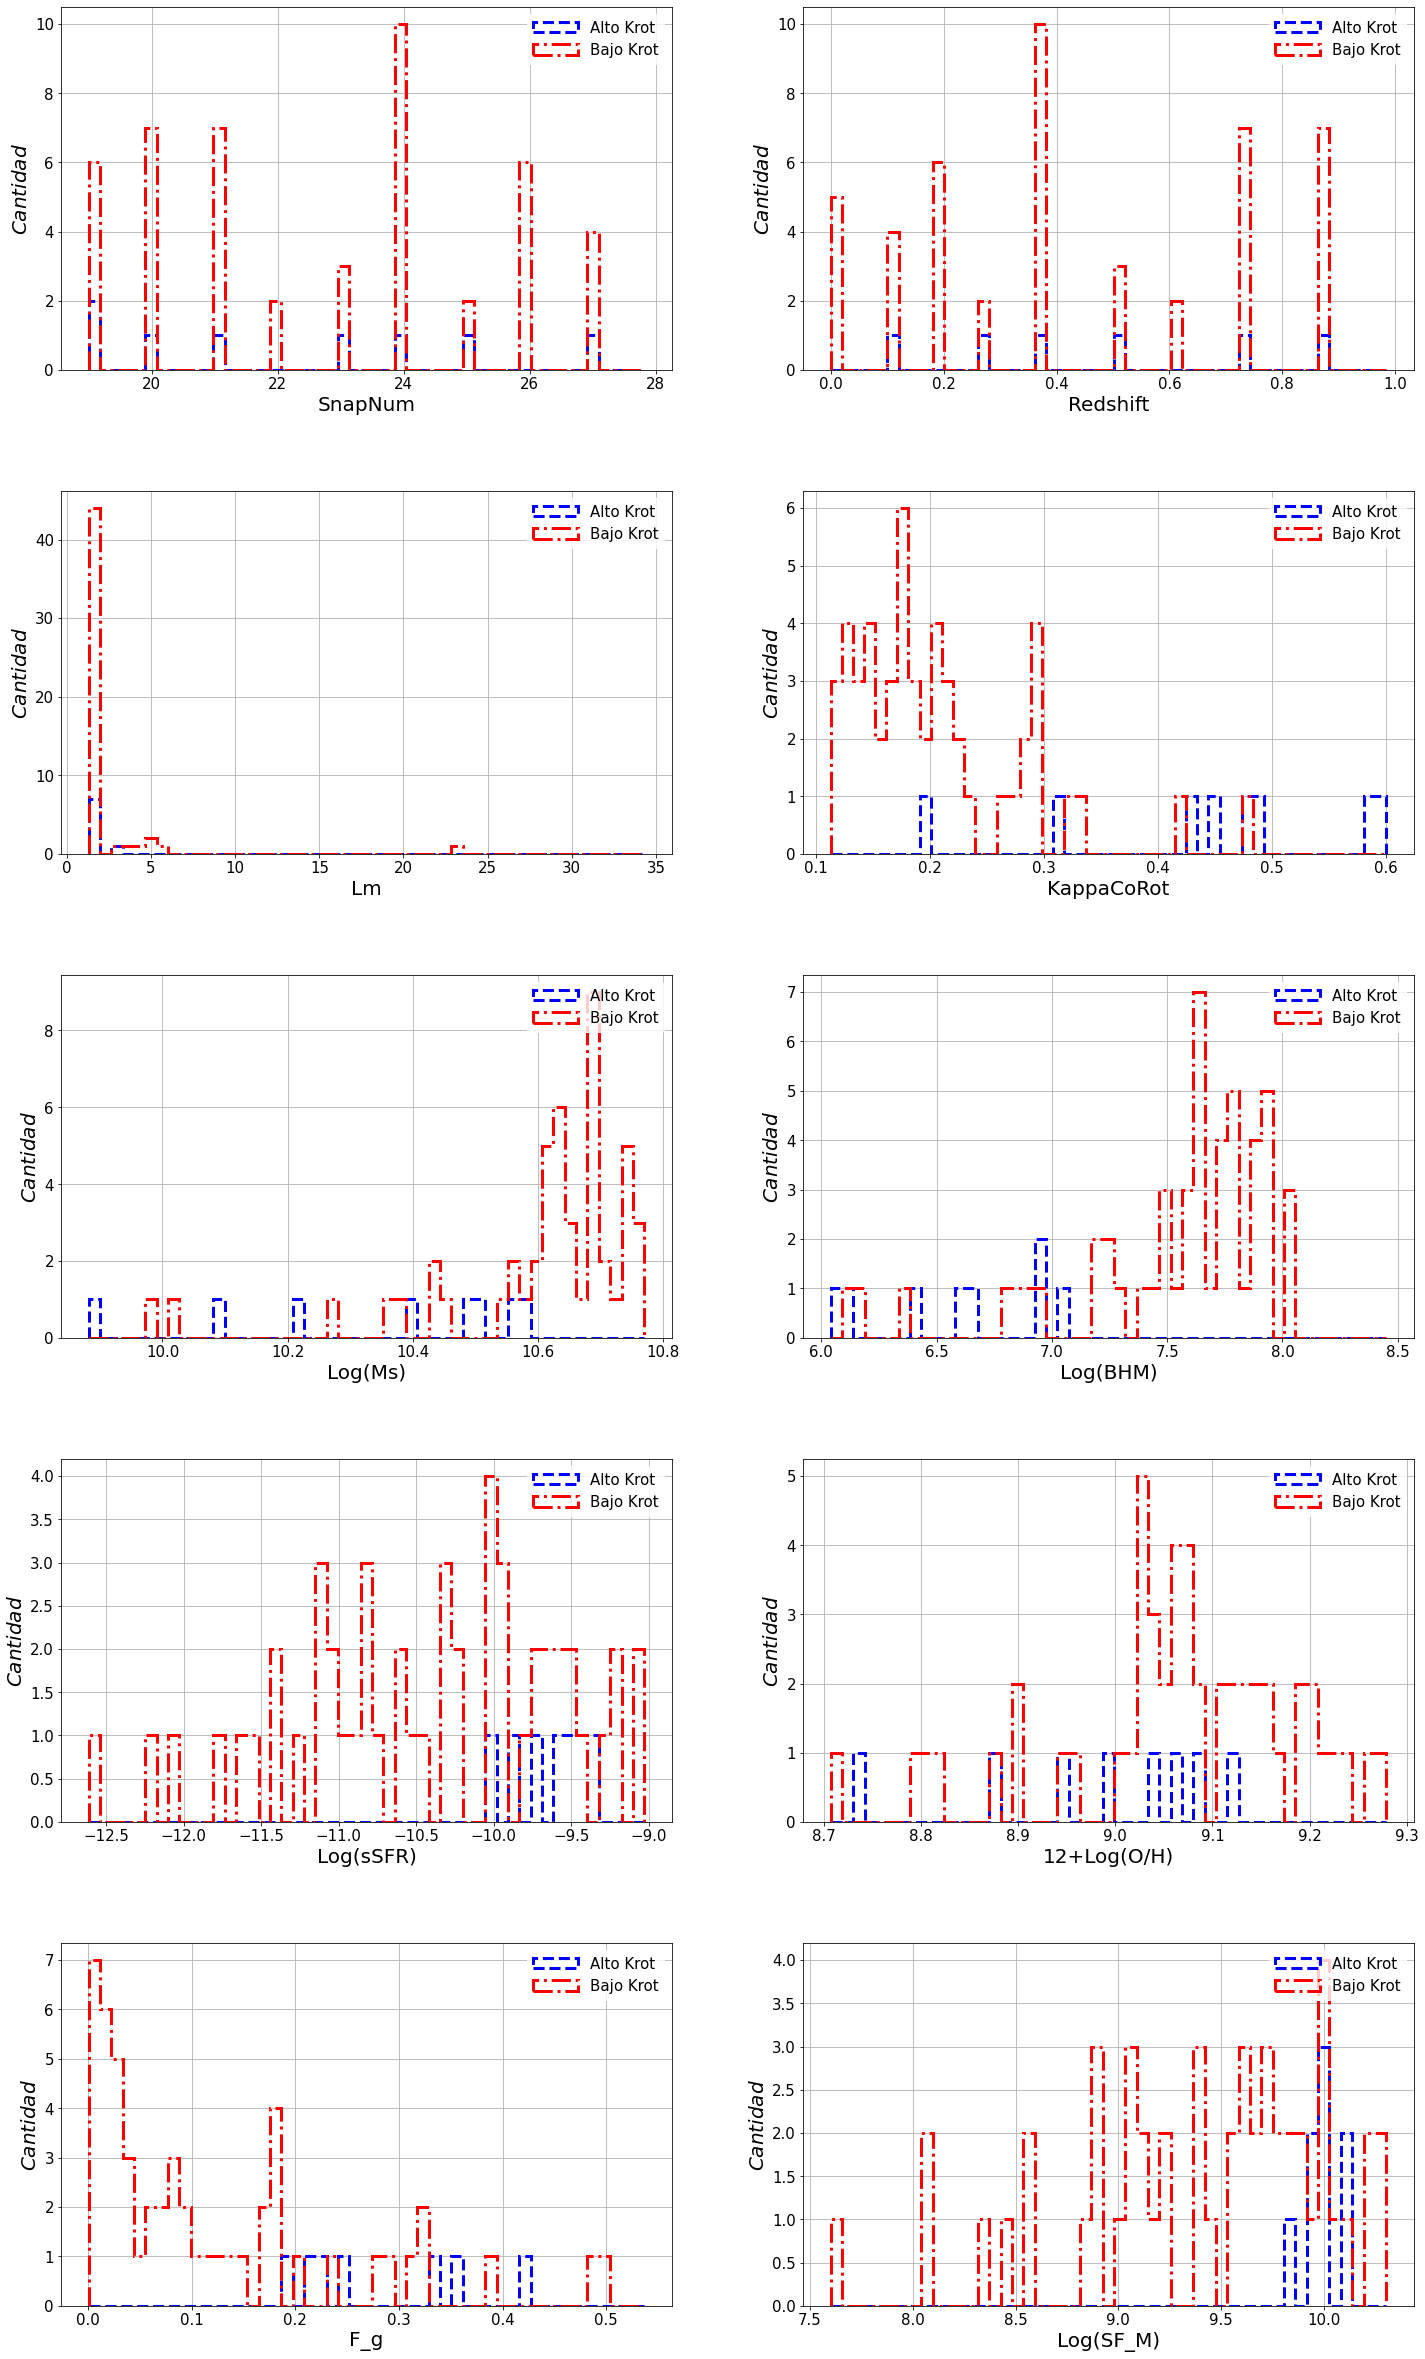

In [28]:
# Histogramas del las variables estudiadas

fig,ax = plt.subplots(5,2,figsize=(22,35))

ax = ax.flatten()

fig.tight_layout(pad=10)

# fontdict ={'fontsize': 40}

# fig.suptitle('Histogramas de la diferencia entre magnitudes pre y post merger. z<=3.Masas <Log_Mstar<.',fontsize=20)

columnas=50

for bajo,alto,i in zip(SELECT_BIN_BAJO.iloc[:,1:].keys(),SELECT_BIN_ALTO.iloc[:,1:].keys(), np.arange(len(SELECT_BIN_BAJO.iloc[:,1:].keys()))):
    
    var_alto = SELECT_BIN_ALTO[alto].values
    
    var_bajo = SELECT_BIN_BAJO[bajo].values
    
    inf_cot = min(min(var_alto),min(var_bajo))
    
    sup_cot = max(max(var_alto),max(var_bajo))
    
    width = abs(inf_cot - sup_cot)/columnas
    
    bins = np.arange(inf_cot, sup_cot, width)

#     weights = np.ones_like(var_alto)/float(len(var_alto))
#     weigths = 1
    ax[i].hist(var_alto,bins=bins,range=(inf_cot,sup_cot),histtype='step',label='Alto Krot',linestyle='--',color='b',linewidth=3)#,weights=weights)

#     weights = np.ones_like(var_bajo)/float(len(var_bajo))       
    ax[i].hist(var_bajo,bins=bins,range=(inf_cot,sup_cot),histtype='step',label='Bajo Krot',linestyle='-.',color='red',linewidth=3)#,weights=weights)
                
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    leg=ax[i].legend(loc='best',fontsize=15,edgecolor='w',handlelength=3)
    ax[i].set_xlabel(alto, fontsize=20)
    ax[i].set_ylabel(r'$Cantidad$',fontsize=20)
    ax[i].grid()
    
# plt.savefig('/home/ramiro/Facultad/Tesis/Figuras/Actividad 10/Histogramas_de_la_diferencia_entre_magnitudes_pre_y_post_merger(z<=3)Masas_'+str(mass_min)+'<Log_Mstar<'+str(mass_max)+'.png')

### Agarramos los dataframes calculados, POST y PRE, y separamos cada uno según su soporte rotacional en el snap 28. Hacempos un histograma para ver como cambian las magnitudes luego del merger

In [29]:
# Separamos por kappacorot del snap 28

#krot altos
SELECT_BIN_ALTO_POST = pd.merge(ID_alto_krot,POST, on = 'GalaxyID_snap28')

SELECT_BIN_ALTO_PRE  = pd.merge(ID_alto_krot,PRE, on = 'GalaxyID_snap28')

SELECT_BIN_ALTO_POST.replace([np.inf, -np.inf], np.nan, inplace=True)# Reemplazamos los valores inf por nan

SELECT_BIN_ALTO_PRE.replace([np.inf, -np.inf], np.nan, inplace=True)# Reemplazamos los valores inf por nan



#krot bajos
SELECT_BIN_BAJO_POST = pd.merge(ID_bajo_krot,POST, on = 'GalaxyID_snap28')

SELECT_BIN_BAJO_PRE = pd.merge(ID_bajo_krot,PRE, on = 'GalaxyID_snap28')

SELECT_BIN_BAJO_POST.replace([np.inf, -np.inf], np.nan, inplace=True)# Reemplazamos los valores inf por nan

SELECT_BIN_BAJO_PRE.replace([np.inf, -np.inf], np.nan, inplace=True)# Reemplazamos los valores inf por nan

## Histograma de antes vs despues del merger para krot altos

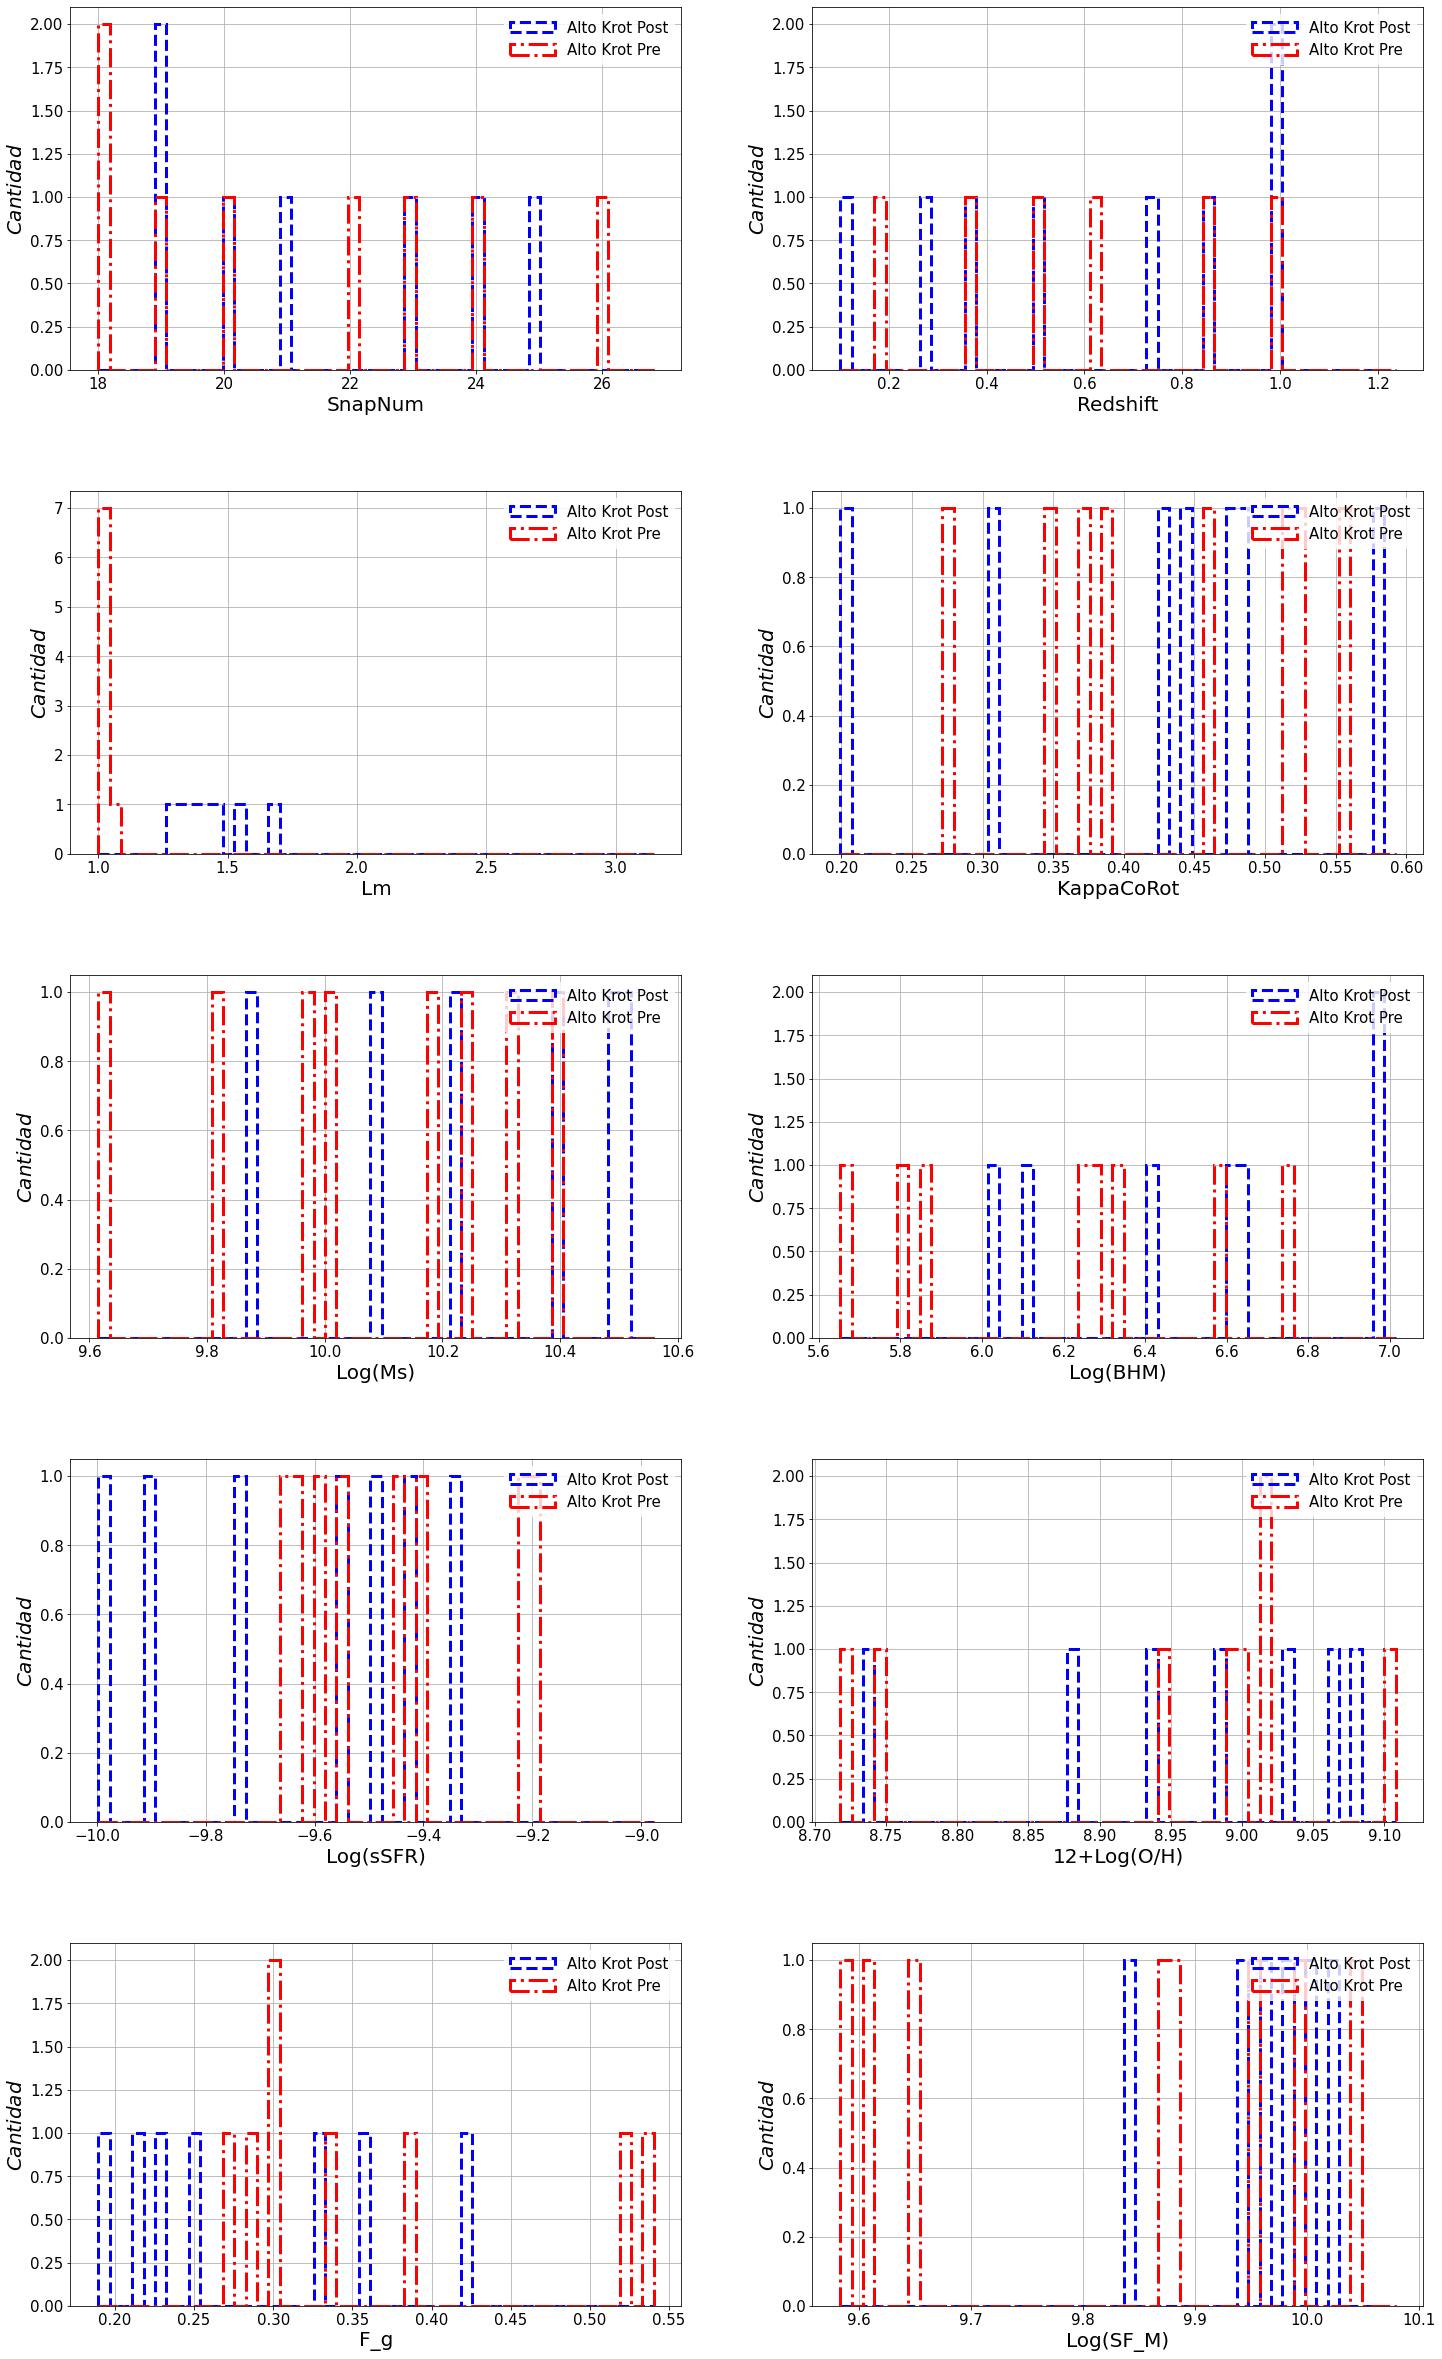

In [30]:
# Histogramas del las variables estudiadas

fig,ax = plt.subplots(5,2,figsize=(22,35))

ax = ax.flatten()

fig.tight_layout(pad=10)

# fontdict ={'fontsize': 40}

# fig.suptitle('Histogramas de la diferencia entre magnitudes pre y post merger. z<=3.Masas <Log_Mstar<.',fontsize=20)

columnas=50

for pre,post,i in zip(SELECT_BIN_ALTO_PRE.iloc[:,1:].keys(),SELECT_BIN_ALTO_POST.iloc[:,1:].keys(), np.arange(len(SELECT_BIN_ALTO_POST.iloc[:,1:].keys()))):
    
    var_post = SELECT_BIN_ALTO_POST[post].values
    
    var_pre = SELECT_BIN_ALTO_PRE[pre].values
    
    inf_cot = min(min(var_post),min(var_pre))
    
    sup_cot = max(max(var_post),max(var_pre))
    
    width = abs(inf_cot - sup_cot)/columnas
    
    bins = np.arange(inf_cot, sup_cot, width)

#     weights = np.ones_like(var_post)/float(len(var_post))
    ax[i].hist(var_post,bins=bins,range=(inf_cot,sup_cot),histtype='step',label='Alto Krot Post',linestyle='--',color='b',linewidth=3)#,weights=weights)

#     weights = np.ones_like(var_pre)/float(len(var_pre))       
    ax[i].hist(var_pre,bins=bins,range=(inf_cot,sup_cot),histtype='step',label='Alto Krot Pre',linestyle='-.',color='red',linewidth=3)#,weights=weights)
                
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    leg=ax[i].legend(loc='best',fontsize=15,edgecolor='w',handlelength=3)
    ax[i].set_xlabel(post, fontsize=20)
    ax[i].set_ylabel(r'$Cantidad$',fontsize=20)
    ax[i].grid()

## Histogramas para antes vs después del merger para kror bajos

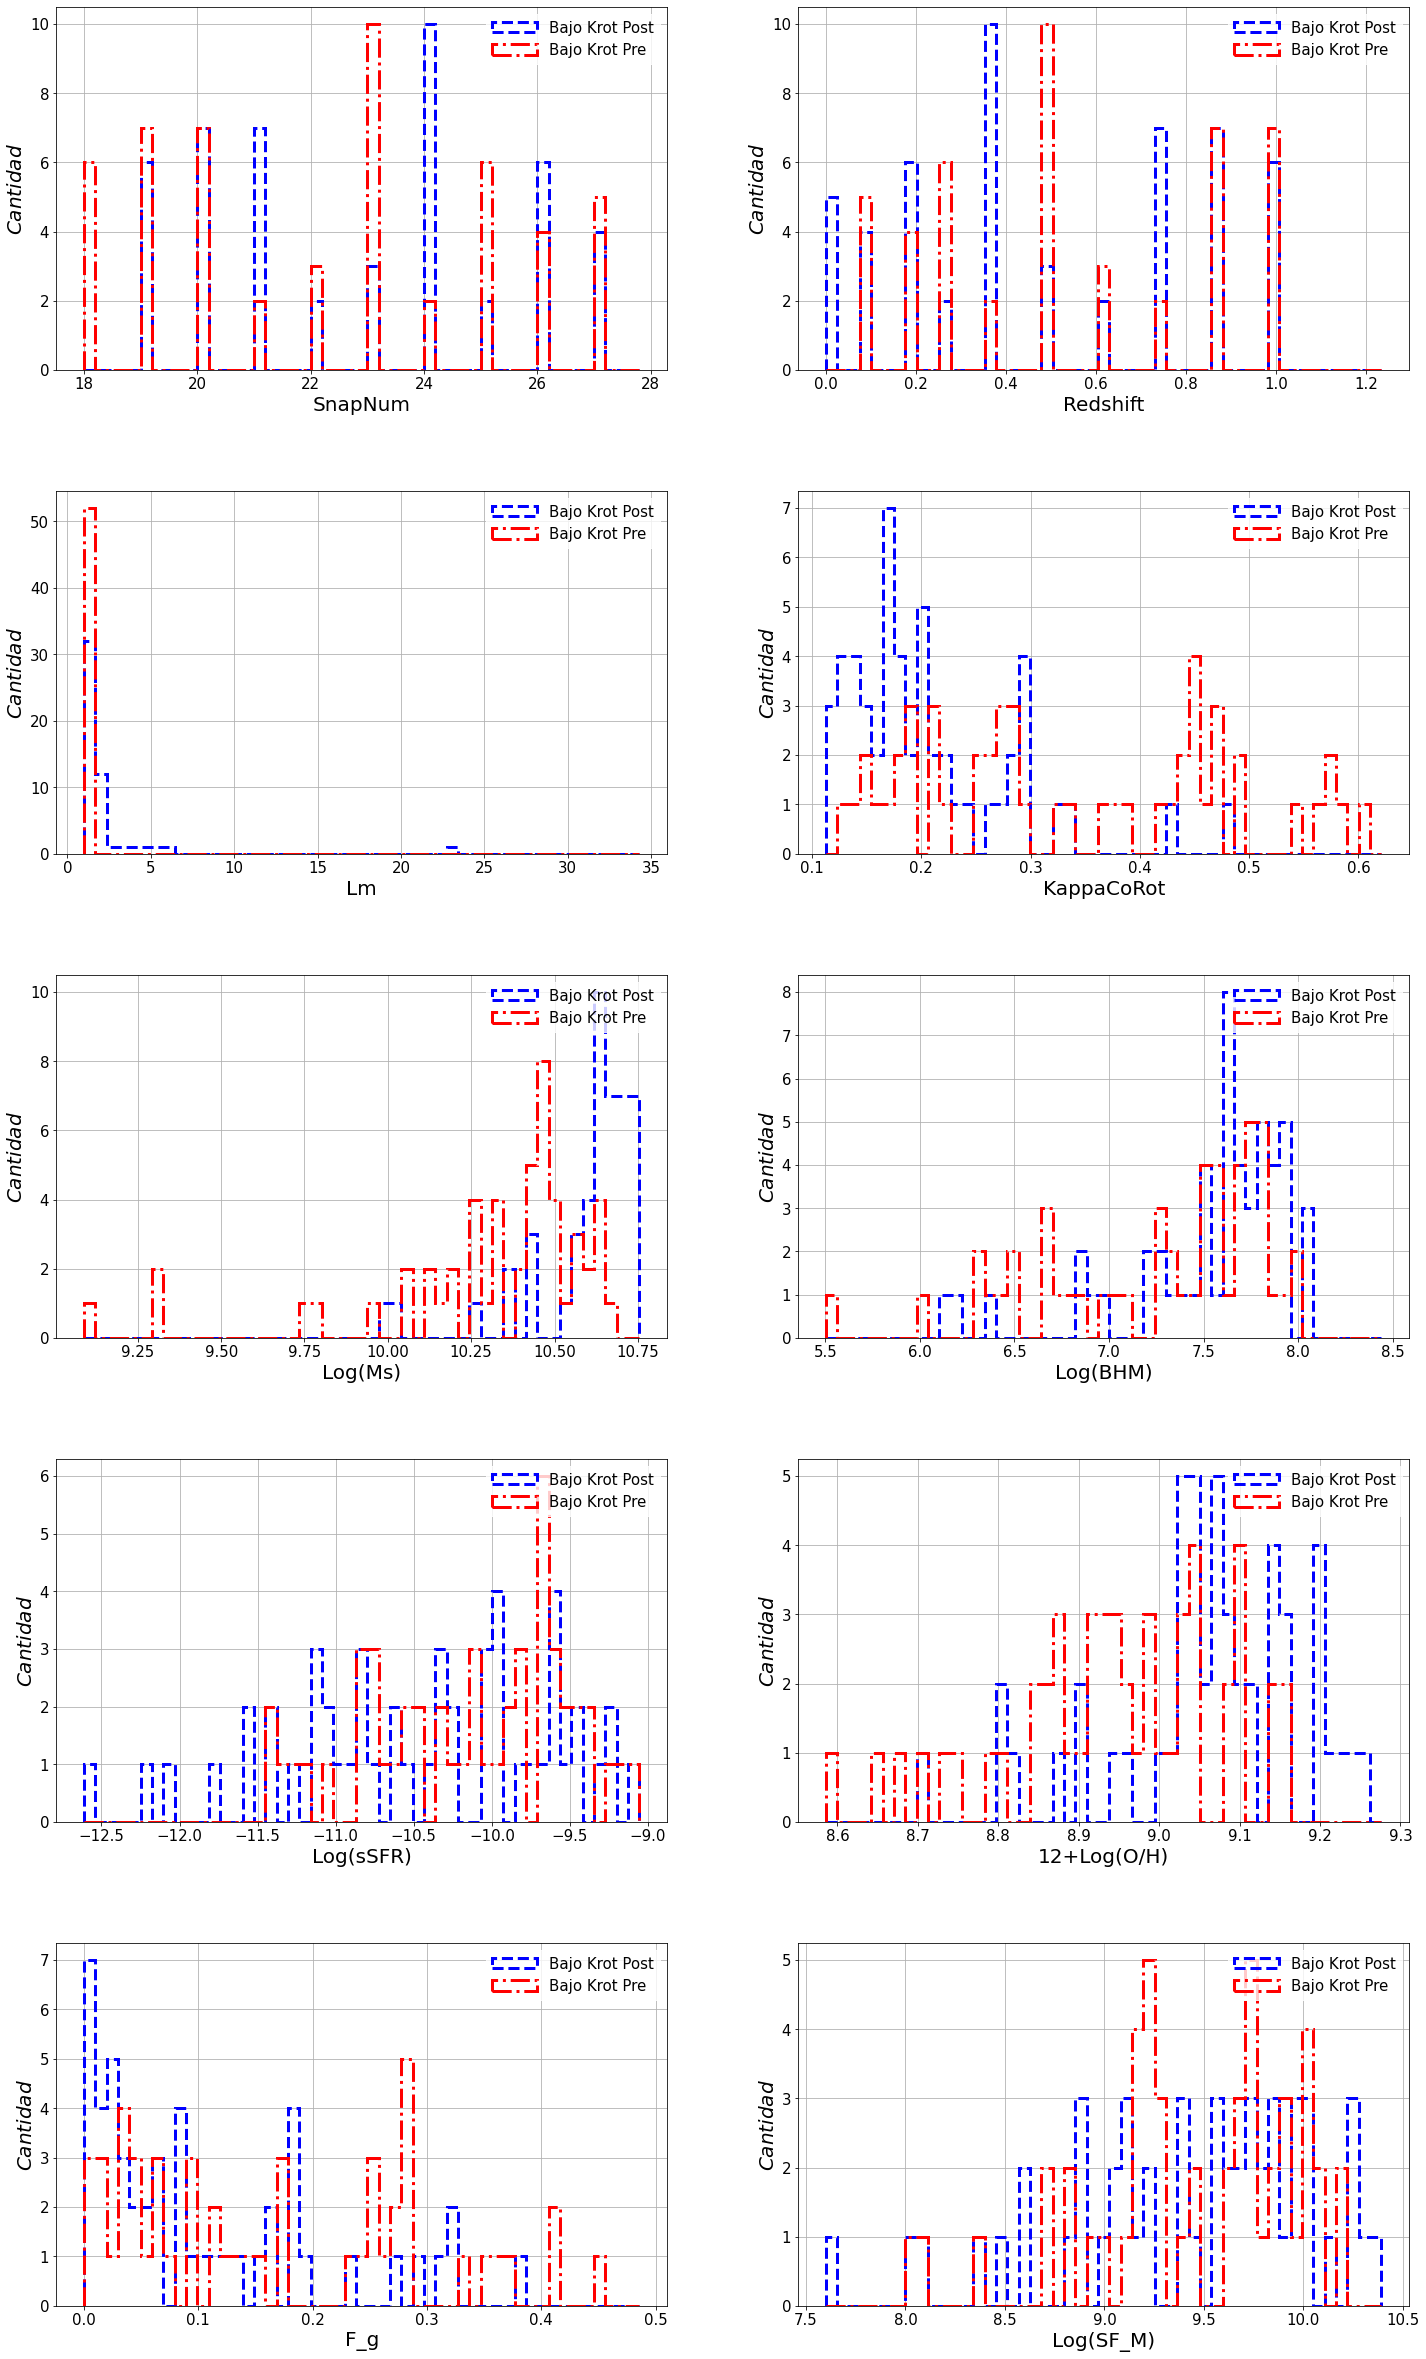

In [31]:
# Histogramas del las variables estudiadas

fig,ax = plt.subplots(5,2,figsize=(22,35))

ax = ax.flatten()

fig.tight_layout(pad=10)

# fontdict ={'fontsize': 40}

# fig.suptitle('Histogramas de la diferencia entre magnitudes pre y post merger. z<=3.Masas <Log_Mstar<.',fontsize=20)

columnas=50

for pre,post,i in zip(SELECT_BIN_BAJO_PRE.iloc[:,1:].keys(),SELECT_BIN_BAJO_POST.iloc[:,1:].keys(), np.arange(len(SELECT_BIN_BAJO_POST.iloc[:,1:].keys()))):
    
    var_post = SELECT_BIN_BAJO_POST[post].values
    
    var_pre = SELECT_BIN_BAJO_PRE[pre].values
    
    inf_cot = min(min(var_post),min(var_pre))
    
    sup_cot = max(max(var_post),max(var_pre))
    
    width = abs(inf_cot - sup_cot)/columnas
    
    bins = np.arange(inf_cot, sup_cot, width)

#     weights = np.ones_like(var_post)/float(len(var_post))
    ax[i].hist(var_post,bins=bins,range=(inf_cot,sup_cot),histtype='step',label='Bajo Krot Post',linestyle='--',color='b',linewidth=3)#,weights=weights)

#     weights = np.ones_like(var_pre)/float(len(var_pre))       
    ax[i].hist(var_pre,bins=bins,range=(inf_cot,sup_cot),histtype='step',label='Bajo Krot Pre',linestyle='-.',color='red',linewidth=3)#,weights=weights)
                
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    leg=ax[i].legend(loc='best',fontsize=15,edgecolor='w',handlelength=3)
    ax[i].set_xlabel(post, fontsize=20)
    ax[i].set_ylabel(r'$Cantidad$',fontsize=20)
    ax[i].grid()

In [29]:
# Fin